Prediction of Forest Cover Type from Cartographic Data
======================================================


Introduction
------------

In this study, we wish to understand what cartographic variables are most predictive of forest cover type. Cartographic variables are stable over time, meaning that they only need to be collected infrequently, and thus are a low-cost way of predicting forest cover type without needing remote sensing data.

Data
----

Data were downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Covertype). 

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

from ipywidgets import interact
from ipywidgets import Dropdown, FloatSlider

Preprocessing
-------------

As the data in the UCI MLR contains only the values of each row, and no columns, we need to preprocess the data.

The preprocessing is divided into two major steps. Firstly, we read in the data and append the columns accordingly. This is lines 1-28 in the code cell below.

Then, add in the climatic zone and geologic zone codes into the data. This is drived from the information provided in the dataset repository. This is lines 29-36.

Finally, in order to save the cleaned data for convenient use elsewhere, we save the data as a CSV file.

In [2]:
# df = pd.read_csv('covtype.data', header=None)

# columns = [
#     'Elevation',
#     'Aspect',
#     'Slope',
#     'Horizontal_Distance_To_Hydrology',
#     'Vertical_Distance_To_Hydrology',
#     'Horizontal_Distance_To_Roadways',
#     'Hillshade_9am',
#     'Hillshade_Noon',
#     'Hillshade_3pm',
#     'Horizontal_Distance_To_Fire_Points'
# ]

# # Add in wilderness area data (binary)
# for i in range(1, 5):
#     columns.append('Wilderness_Area_{0}'.format(i))
    
# # Add in soil type data (binary)
# for i in range(1, 41):
#     columns.append('Soil_Type_{0}'.format(i))

# # Add in soil cover type
# columns.append('Cover_Type')

# df.columns = columns

# # Add in soil codes. These were downloaded from the UCI repository.
# soil_codes = pd.read_csv('climatic_geologic_zone.csv')
# soil_dict = soil_codes.set_index('soil_type').to_dict()

# # Add geologic and climatic zone code to soil type
# for i in range(1, 41):
#     df.loc[df['Soil_Type_{i}'.format(i=i)] == 1, 'Climatic_Zone'] = soil_dict['climatic_zone'][i]
#     df.loc[df['Soil_Type_{i}'.format(i=i)] == 1, 'Geologic_Zone'] = soil_dict['geologic_zone'][i]
    
# # Encode one-of-K for the geologic zone, climatic zone, and cover_type encodings.
# # This is important because the geologic and climatic zones aren't ordinal - they are strictly categorical.
# enc = OneHotEncoder()
# clm_zone_enc = enc.fit_transform(df['Climatic_Zone'].values.reshape(-1, 1)).toarray()
# geo_zone_enc = enc.fit_transform(df['Geologic_Zone'].values.reshape(-1, 1)).toarray()
# cov_type_enc = enc.fit_transform(df['Cover_Type'].values.reshape(-1, 1)).toarray()

# for i in range(clm_zone_enc.shape[1]):
#     df['Climatic_Zone_{i}'.format(i=i)] = clm_zone_enc[:, i]

# for i in range(geo_zone_enc.shape[1]):
#     df['Geologic_Zone_{i}'.format(i=i)] = geo_zone_enc[:, i]
    
# del df['Climatic_Zone']
# del df['Geologic_Zone']

# df.to_csv('covtype_preprocess.csv')

Data Checks
--------

We first checked that the basic parameters of the data are all correct.

In [3]:
df = pd.read_csv('covtype_preprocess.csv', index_col=0)

According to the information given, there should be 581012 rows of data.

In [4]:
df.shape

(581012, 66)

We check that all columns are represented, including the one-of-K columns

In [5]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1',
       'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
       'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4',
       'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8',
       'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12',
       'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16',
       'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20',
       'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24',
       'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28',
       'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
       'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36',
       'Soil_Type_37', '

Just to make sure everything looks right, we will also check a random sample of 10 rows from the data.

In [6]:
df.sample(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Climatic_Zone_1,Climatic_Zone_2,Climatic_Zone_3,Climatic_Zone_4,Climatic_Zone_5,Climatic_Zone_6,Geologic_Zone_0,Geologic_Zone_1,Geologic_Zone_2,Geologic_Zone_3
383707,2704,80,15,268,65,2402,239,212,100,2440,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
120753,2752,351,3,42,2,1749,214,234,158,2571,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
349048,3137,24,6,242,29,2232,217,226,146,2465,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
571755,2590,181,35,323,134,1048,207,236,132,1087,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
293059,2311,47,32,85,46,450,212,155,56,579,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
472459,3273,200,13,150,5,3668,214,251,169,1642,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
185692,3019,83,8,300,12,1727,231,227,128,1774,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
211722,2654,15,18,134,49,765,202,201,132,1842,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
292262,3350,3,15,67,18,4412,198,210,148,4097,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
260346,2826,322,25,553,178,1045,147,205,193,1380,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


Finally, we want to know whether there are `NaN` values present or not. If there are, we need to drop those.

In [7]:
# This line came from StackOverflow: http://stackoverflow.com/questions/14016247/python-find-integer-index-of-rows-with-nan-in-pandas
pd.isnull(df).any(1).nonzero()[0]

array([], dtype=int64)

There are no `NaN`s, which is a good thing!

Exploratory Data Analysis
--------

Before throwing a machine learning model at the problem, we would like to visually check first to see whether there's a relationship between the output variable (cover type) and the explanatory variables (all other columns).

For the quantitative variables, we will use violin plots to visualize their distributions to see which ones are most discriminant amongst the 7 cover type classes.

In [8]:
# Some helper variables just in case.
quant_cols = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 
              'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
              'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

input_cols = [c for c in df.columns if 'Cover_Type' not in c]
output_cols = ['Cover_Type']

output_cols

['Cover_Type']

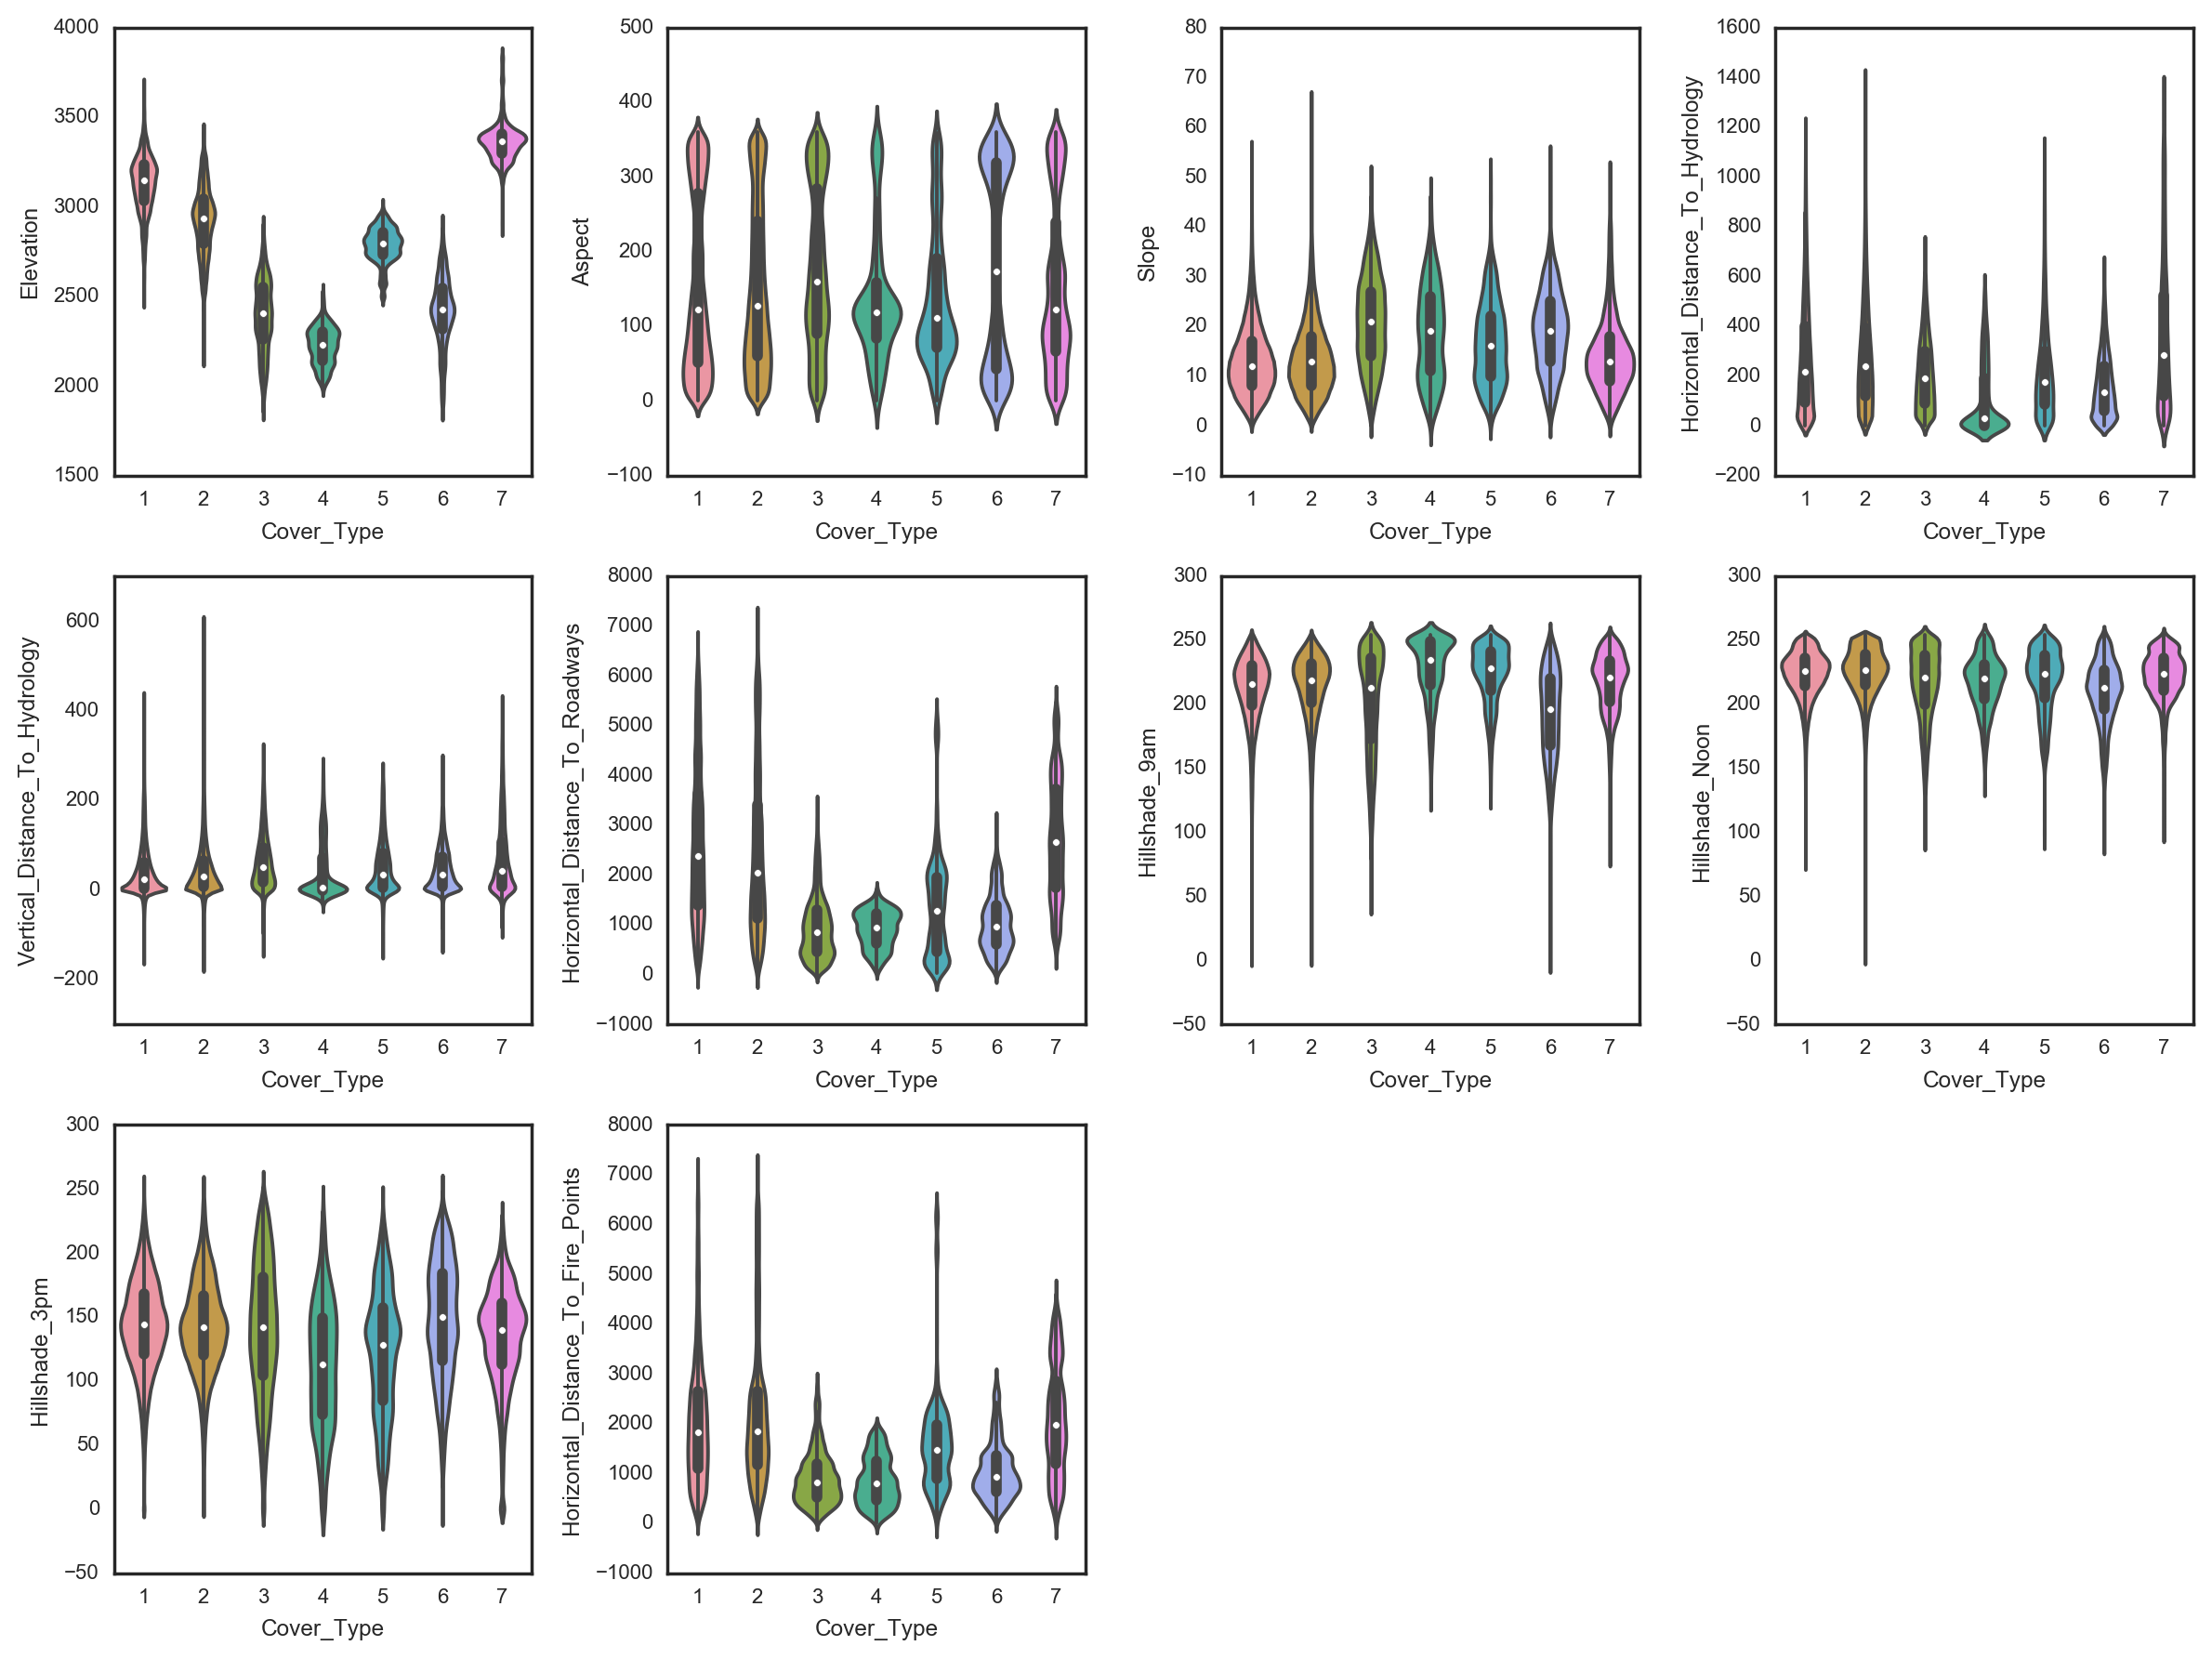

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('white')
sns.set_context('paper')

# We have 10 quantitative variables, therefore do a 2 row, 5 col plot.
n_rows = 3
n_cols = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 9))

i = 0
for axrows in axes:
    for ax in axrows:
        if i < len(quant_cols):
            sns.violinplot(data=df, x='Cover_Type', y=quant_cols[i], ax=ax)
            i += 1
        else:
            fig.delaxes(ax)
plt.tight_layout()

**Figure 1:** Distribution of quantitative explanatory variables for each cover type.

From the distributions of data, it looks like on its own, only elevation has some measure of discriminatory power to be able to distinguish between the cover types. As for the others, they may have better discriminatory power if used in conjunction with one another, but won't be able to stand alone. For example, under **Elevation**, there are 5 cover types that have a clearly bimodal distribution, with the two modes at different locations, but they overlap quite a bit. As another example, under **Horizontal Distance to Roadways**, there are four cover types with low median distance and three with a higher horizontal distance, and that information may be useful in conjunction with other features. You can verify this further in the interactive cell below.

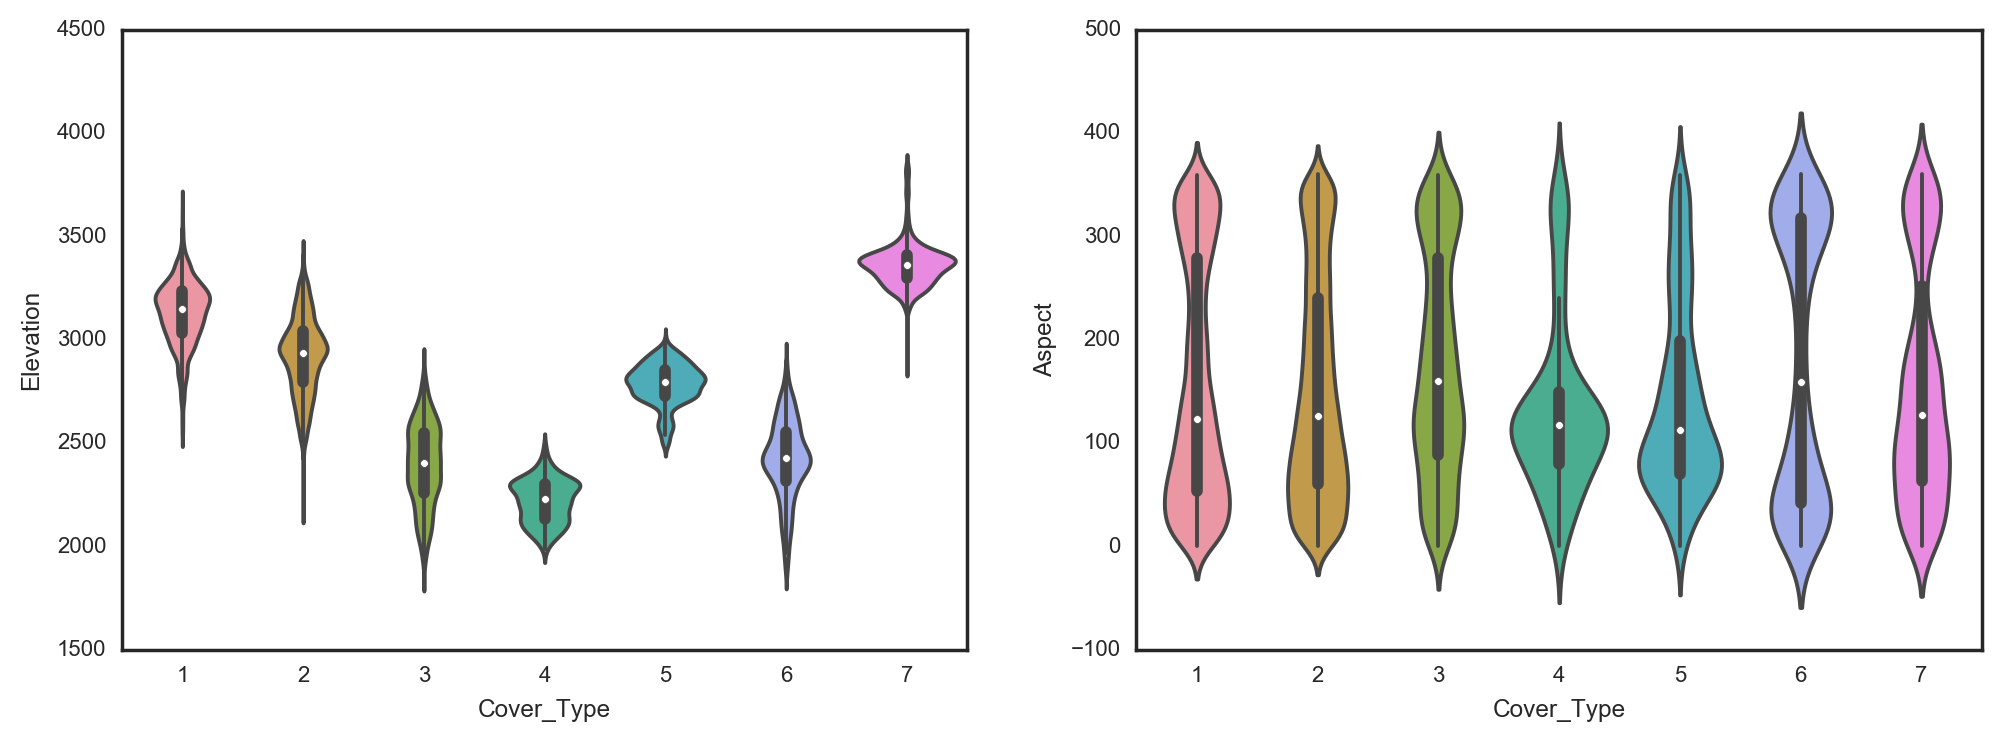

<function __main__.make_plot>

In [10]:
def make_plot(col1, col2, sample_frac=0.1):
    """
    col1, col2: (str) column names from inside the dataframe.
    sample_frac: (float) the fraction of the data to use for plotting. Mainly a speed-thing.
    """
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.violinplot(data=df.sample(frac=sample_frac), x='Cover_Type', y=col1, ax=axes[0])
    sns.violinplot(data=df.sample(frac=sample_frac), x='Cover_Type', y=col2, ax=axes[1])
    
    plt.show()
    
    
col1_drop = Dropdown(options=quant_cols, value=quant_cols[0], description='Column 1')
col2_drop = Dropdown(options=quant_cols, value=quant_cols[1], description='Column 2')
samp_slid = FloatSlider(min=0.1, max=1.0, step=0.1, value=0.1, description='Data Fraction')
interact(make_plot, col1=col1_drop, col2=col2_drop, sample_frac=samp_slid)

**Interactive Figure 2:** Select two quantitative variables to compare how discriminative their distributions w.r.t. each cover type is. More discriminative quantitative variables will show greater distribution *separation* between the cover types; less discriminative quantitative variables will show greater distribution *overlap*.

For the categorical variables, we will compute and plot a metric of correlation, the mutual information score.

In [11]:
# Categorical cols are columns that are present in the input cols but not present in the quantitative cols
categorical_cols = sorted(list(set(input_cols).difference(quant_cols)))

# Compute each categorical column's mutual information score with Cover_Type
from sklearn.metrics import normalized_mutual_info_score as nmi
import numpy as np

nmis = []
for col in categorical_cols:
    nmis.append(nmi(df['Cover_Type'], df[col]))

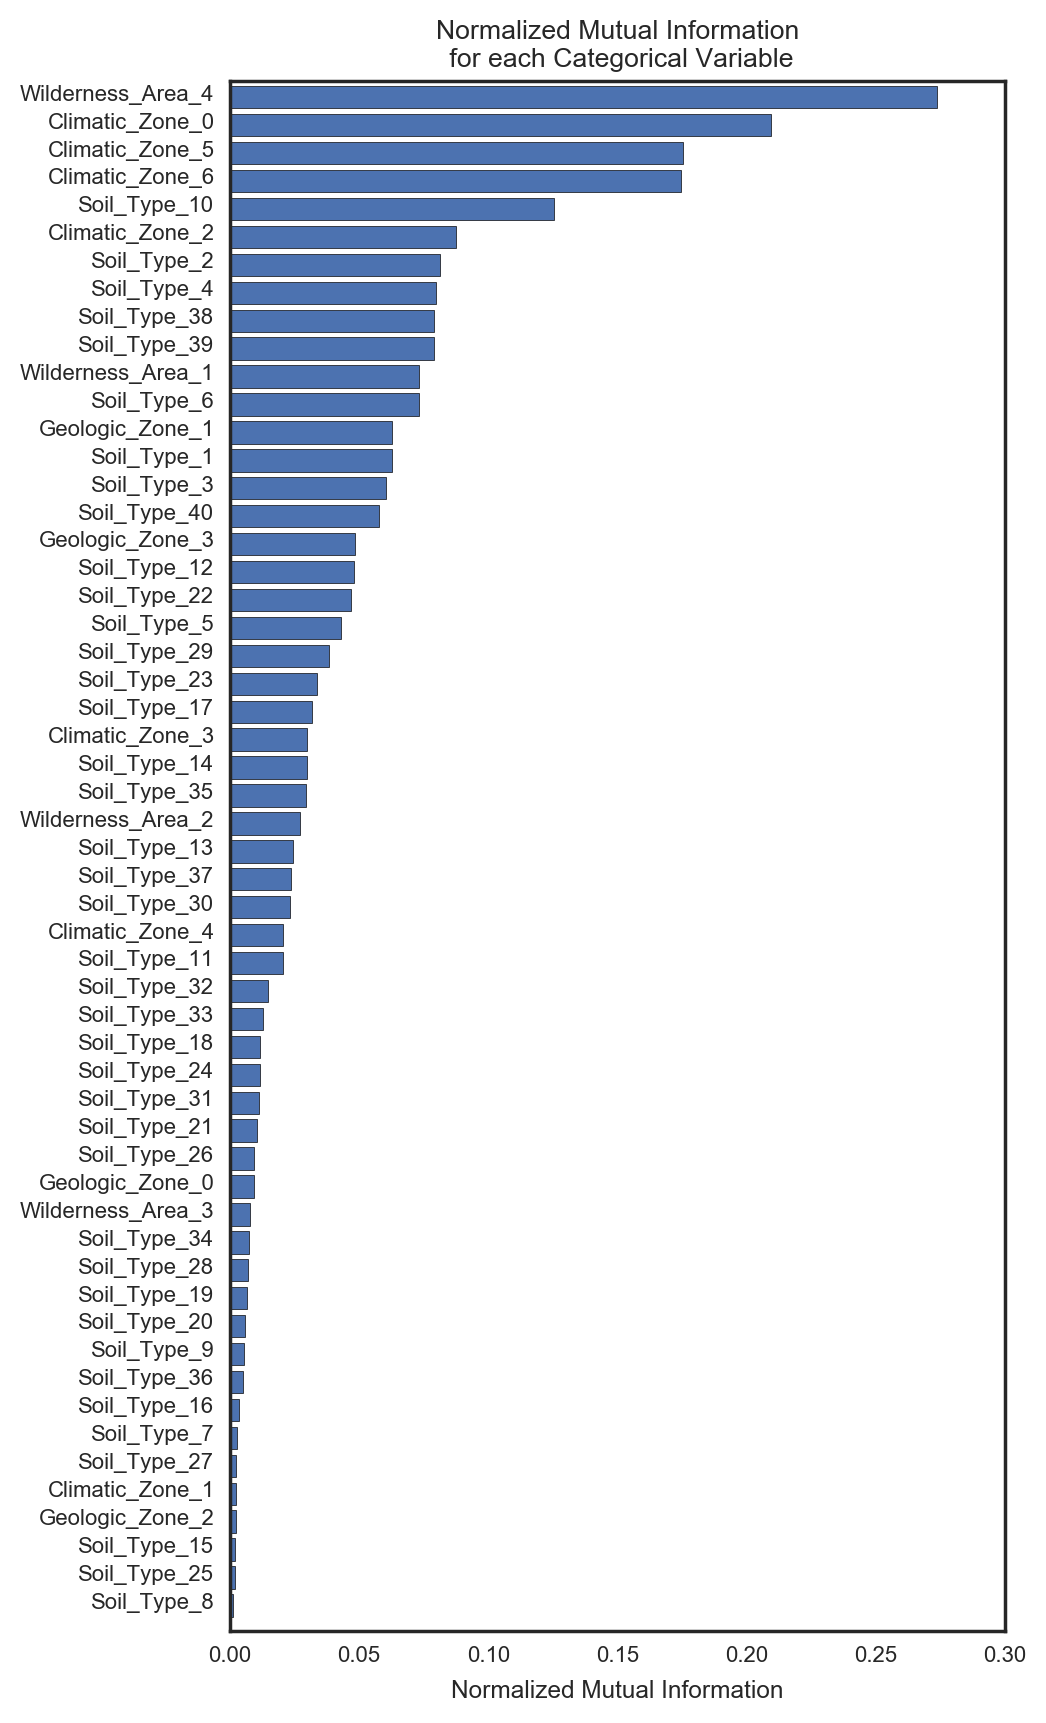

<function __main__.plot_nmi>

In [12]:
# Plot the normalized mutual information.

def make_nmi_df():
    nmi_df = pd.DataFrame()
    nmi_df['features'] = categorical_cols
    nmi_df['mutual_information'] = nmis    
    
    return nmi_df

def plot_nmi(sort_by_value=False):
    nmi_df = make_nmi_df()
    if sort_by_value:
        nmi_df.sort_values(by='mutual_information', inplace=True)

    pos = np.arange(len(categorical_cols)) + 0.5
    plt.figure(figsize=(5, 10))
    plt.barh(range(len(nmi_df)), nmi_df['mutual_information'])
    plt.yticks(pos, nmi_df['features'])
    plt.ylim(-0.5, max(pos) + 0.5)
    plt.xlabel('Normalized Mutual Information')
    plt.title('Normalized Mutual Information\n for each Categorical Variable')
    plt.show()
    
    
sort_drop = Dropdown(options=[True, False], value=True, description='Sort')
interact(plot_nmi, sort_by_value=sort_drop)

In [31]:
# Save NMI data to disk.

nmi_df = make_nmi_df()
nmi_df.to_csv('nmi.csv')

Looking at this information, it looks like the best way forward is to use an ensemble classifier rather than a linear classifier. Each individual categorical and quantitative feature might not be predictive enough, but in aggregate, they might be.

With half a million data points, we will randomly subsample only a fraction of the data (10%) for model training. Up front, the model selection strategy will go in the following stages. First, we will pick the best "vanilla" ensemble classifier (i.e. without tweaking). Each vanilla model will be tested on 5-fold cross validation on the same subset of data. Then we will tweak the best model's parameters.

In [13]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.metrics import f1_score

# Sample 10% of the data.
df_samp = df.sample(frac=0.1)


X_traintest, X_val, Y_traintest, Y_val = train_test_split(df_samp[input_cols], df_samp[output_cols], test_size=0.2)

X_train, X_test, Y_train, Y_test = train_test_split(X_traintest, Y_traintest, test_size=0.2)

# Create a CV iterator.
cv = ShuffleSplit(n_splits=4)

In [14]:
# classifiers = {'rfc': RandomForestClassifier(), 
#                'abc': AdaBoostClassifier(), 
#                'bgc': BaggingClassifier(), 
#                'etc': ExtraTreesClassifier()
#               }

In [15]:
# import warnings

# warnings.filterwarnings('ignore')

# scores = dict()

# scores['rfc'] = cross_val_score(classifiers['rfc'], df_samp[input_cols], df_samp[output_cols].values.ravel(), cv=cv, n_jobs=-1, scoring='f1_weighted')
# scores['abc'] = cross_val_score(classifiers['abc'], df_samp[input_cols], df_samp[output_cols].values.ravel(), cv=cv, n_jobs=-1, scoring='f1_weighted')
# scores['bgc'] = cross_val_score(classifiers['bgc'], df_samp[input_cols], df_samp[output_cols].values.ravel(), cv=cv, n_jobs=-1, scoring='f1_weighted')
# scores['etc'] = cross_val_score(classifiers['etc'], df_samp[input_cols], df_samp[output_cols].values.ravel(), cv=cv, n_jobs=-1, scoring='f1_weighted')

# # clf = RandomForestClassifier()
# # clf.fit(X_train, Y_train.values.ravel())

In [16]:
# scores

In [17]:
def summary_stats(dictionary):
    summary_stats = []
    for k, v in dictionary.items():
        newdict = dict()
        newdict['classifier'] = k
        newdict['mean'] = np.mean(v)
        newdict['std']= np.std(v)
        summary_stats.append(newdict)
    return summary_stats

# summary_stats(scores)

In [18]:
# vanilla_means = pd.DataFrame(summary_stats(scores))
# vanilla_means.plot(kind='bar', x='classifier', y='mean', yerr='std')

Looking at the scores, a plain vanilla Random Forest (personal favourite) performed a close second-best to the Bagging Classifier. However, even though this is true, Random Forest affords some measure of interpretability through the `feature_importances_` attribute, which the Bagging Classifier doesn't have.

In [19]:
n_est = [30, 40, 50, 60, 70, 80, 90]
scores = []

for n in n_est:
    print(n)
    clf = RandomForestClassifier(n_estimators=n)
    cv_scores = cross_val_score(clf, X_train, Y_train.values.ravel(), cv=cv, scoring='f1_weighted', n_jobs=-1)
    scores.append(cv_scores)
scores

30
40
50
60
70
80
90


[array([ 0.85269693,  0.84443139,  0.85399613,  0.85203533]),
 array([ 0.84923021,  0.84723462,  0.84797177,  0.85633632]),
 array([ 0.84942646,  0.85944968,  0.85474428,  0.84535071]),
 array([ 0.86199658,  0.86428141,  0.8593624 ,  0.85913425]),
 array([ 0.86531026,  0.8554076 ,  0.85771767,  0.85627916]),
 array([ 0.85754779,  0.85630063,  0.84814645,  0.86491697]),
 array([ 0.85862781,  0.85895315,  0.85439302,  0.87016087])]

(20, 100)

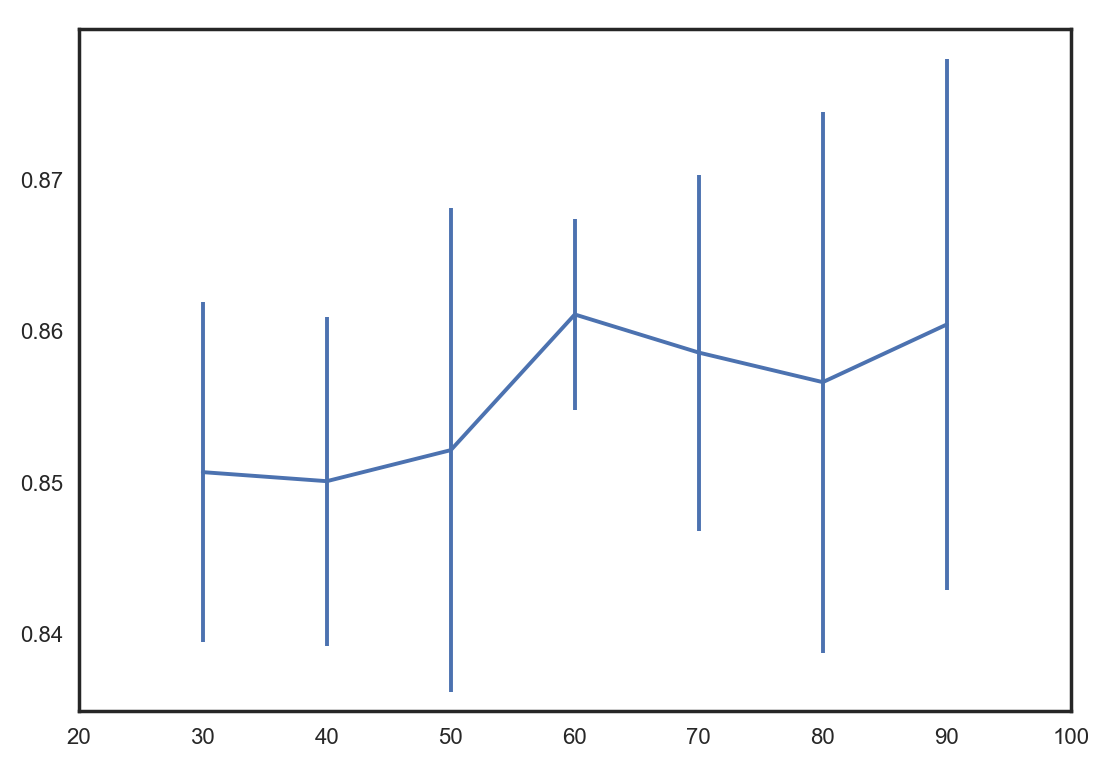

In [20]:
# plt.scatter(n_est, np.array(scores).mean(axis=1))
plt.errorbar(n_est, np.array(scores).mean(axis=1), yerr=np.array(scores).std(axis=1)*3)
plt.xlim(20, 100)

Looking at the performance metrics, it looks like the base estimator with 30 trees is good enough. It's also pretty darn fast. Let's continue with that and explore whether the confusion matrix shows good performance. Also, let's now switch to the full dataset.

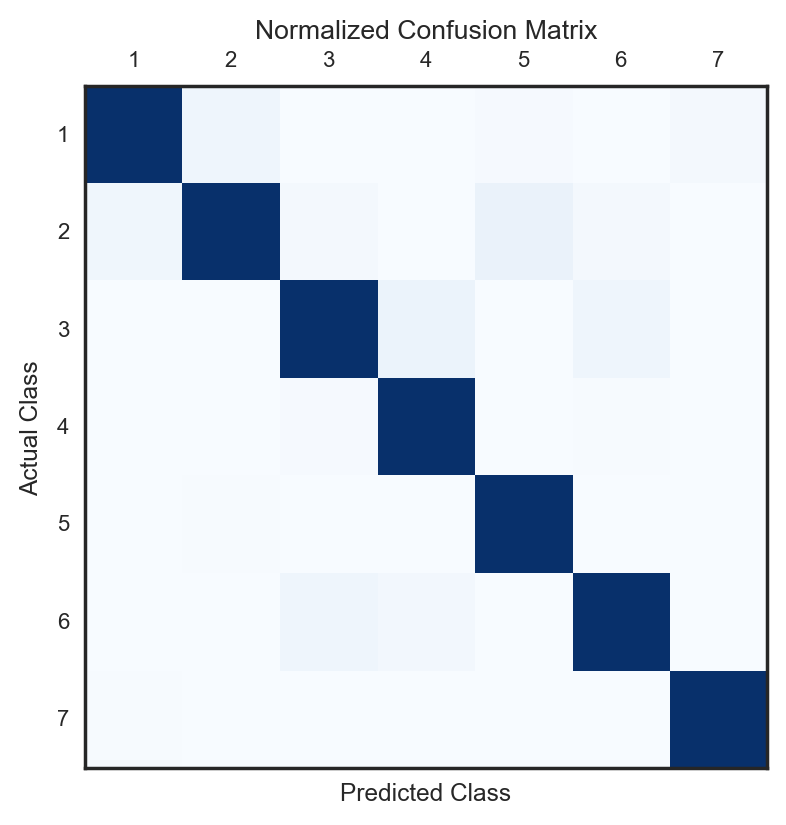

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Train test split on the full dataset.
X_train, X_test, Y_train, Y_test = train_test_split(df[input_cols], df[output_cols], test_size=0.2)

clf = RandomForestClassifier(n_estimators=30)
clf.fit(X_train, Y_train.values.ravel())
preds = clf.predict(X_test)
# score = f1_score(Y_test, preds, average='weighted')

# Compute the confusion matrix and normalize it to the max of each row.
confusion_mat = confusion_matrix(Y_test, preds)
confusion_mat = confusion_mat / confusion_mat.max(axis=1)

fig1 = plt.figure(1)
plt.matshow(confusion_mat, cmap=plt.cm.Blues)
ax = plt.gca()
ax.set_xticklabels(range(0, 8))
ax.set_yticklabels(range(0, 8))
ax.set_xlabel('Predicted Class')
ax.set_ylabel('Actual Class')
plt.title('Normalized Confusion Matrix')

In [22]:
score = f1_score(Y_test, preds, average='weighted')
score

from sklearn.metrics import classification_report

print(classification_report(Y_test, preds))

             precision    recall  f1-score   support

          1       0.96      0.94      0.95     42575
          2       0.95      0.97      0.96     56566
          3       0.93      0.96      0.95      7173
          4       0.92      0.83      0.88       559
          5       0.93      0.76      0.83      1838
          6       0.93      0.87      0.90      3458
          7       0.97      0.93      0.95      4034

avg / total       0.95      0.95      0.95    116203



Normalized confusion matrix: Each row is normalized to the maximal value.

Based on the confusion matrix and the F1 score, it looks like the performance of the classifier is reasonably good.

Some difficulties remain. For example, it is most difficult to accurately identify Cover_Type class 4 (Cottonwood/Willow) and 6 (Douglas-fir).

Feature Importances
------------

What are the most important features for determining the forest cover type? Let us look for the features that cumulatively sum up to 95% of the total feature importances.

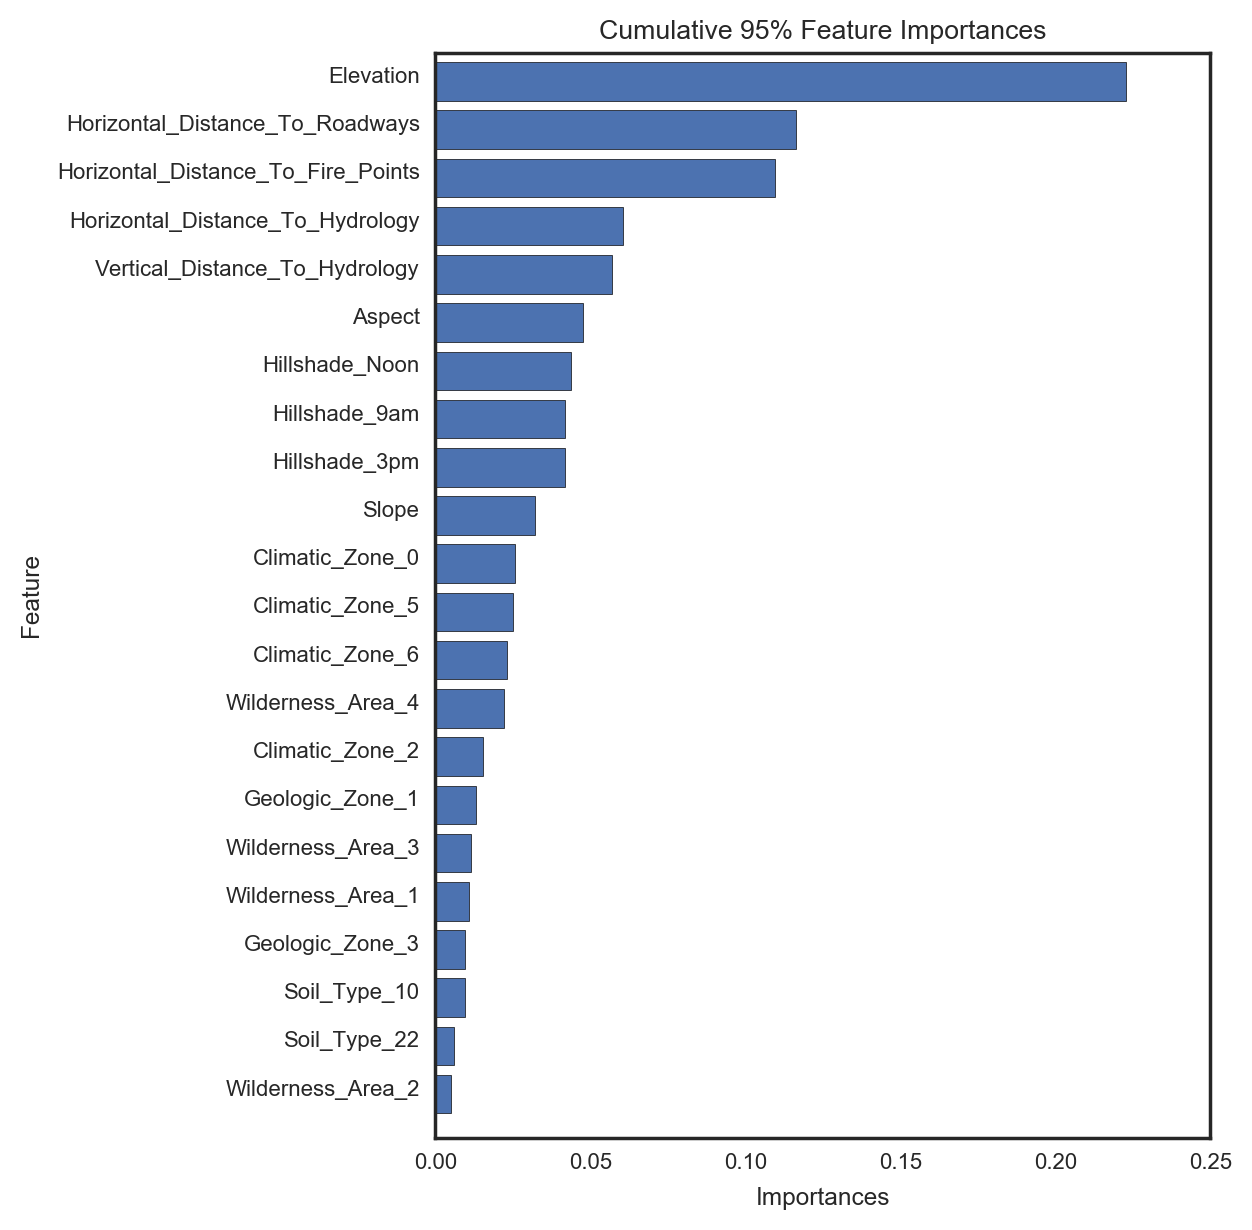

<function __main__.plot_feat_impts>

In [23]:
def make_feat_impts():
    feat_impts = pd.DataFrame()
    feat_impts['Features'] = X_test.columns
    feat_impts['Importances'] = clf.feature_importances_
    feat_impts.sort_values(by='Importances', ascending=False, inplace=True)
    feat_impts['Cumulative Importance'] = feat_impts['Importances'].cumsum()
    
    return feat_impts

def filter_cumulative_feat_impts(feat_impts):
    feat_impts = feat_impts[feat_impts['Cumulative Importance'] < 0.95]
    return feat_impts

def sort_feat_impts(feat_impts):
    feat_impts = feat_impts.sort_values(by='Importances', ascending=True)
    return feat_impts


def plot_feat_impts(sort=False, filter_cumulative=False):
    feat_impts = make_feat_impts()
    if filter_cumulative:
        feat_impts = filter_cumulative_feat_impts(feat_impts)
    if sort:
        feat_impts = sort_feat_impts(feat_impts)
    elif not sort:
        feat_impts.sort_values(by='Features', inplace=True)

    # Plot the feature importances.
    pos = np.arange(len(feat_impts)) + 0.5
    plt.figure(figsize=(5, 7))
    plt.barh(range(len(feat_impts)), feat_impts['Importances'])
    plt.yticks(pos, feat_impts['Features'])
    plt.ylim(-0.5, max(pos) + 0.5)
    plt.xlabel('Importances')
    plt.ylabel('Feature')
    if filter_cumulative:
        plt.title('Cumulative 95% Feature Importances')
    else:
        plt.title('Feature Importances')
    plt.show()
    
sort_drop = Dropdown(options=[False, True], value=True, description='Sort')
filter_drop = Dropdown(options=[False, True], value=True, description='Filter')
interact(plot_feat_impts, sort=sort_drop, filter_cumulative=filter_drop)

Cumulatively, the features shown above account for at most 95% of all of the feature importances learned by the Random Forest classifier. The quantitative variables carry most of the importance, while the type qualitative/categorical variables carry significantly less.

Let us now explore how each of these select variables are related with forest cover type.

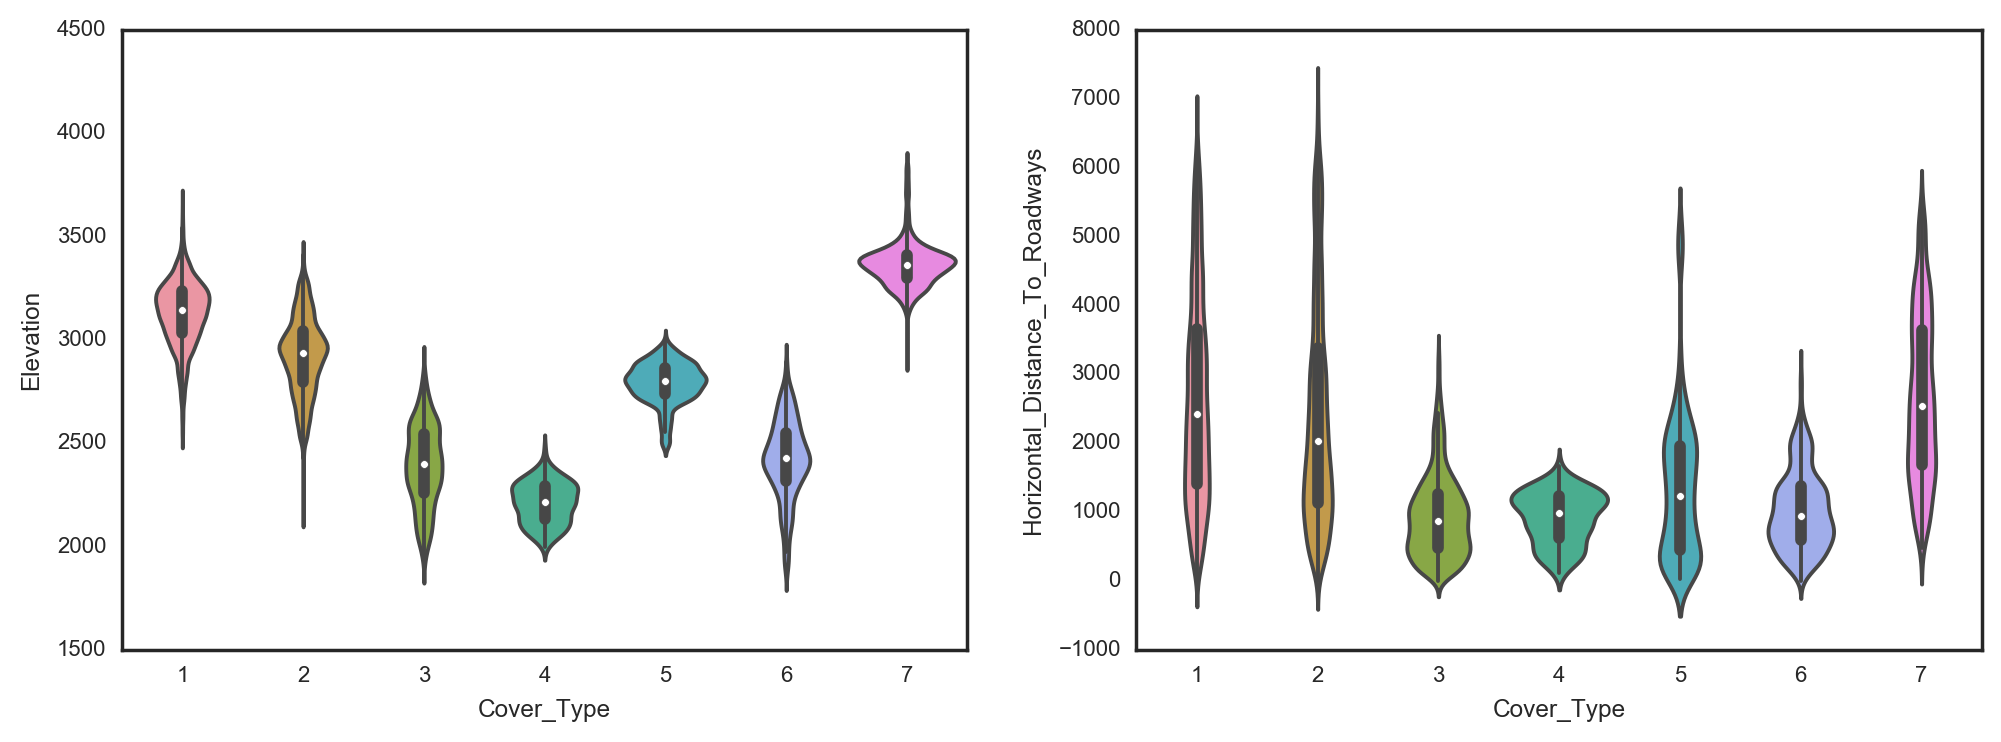

<function __main__.make_plot>

In [24]:
feat_impts = make_feat_impts()
feat_impts = filter_cumulative_feat_impts(feat_impts)
feat_impts.sort_values(by='Importances', inplace=True, ascending=False)
select_quant_feats = [c for c in feat_impts['Features'] if c in quant_cols]
select_qual_feats = [c for c in feat_impts['Features'] if c in categorical_cols]

col1_drop = Dropdown(options=select_quant_feats, value=select_quant_feats[0], description='Left Plot')
col2_drop = Dropdown(options=select_quant_feats, value=select_quant_feats[1], description='Right Plot')
samp_slid = FloatSlider(min=0.1, max=1.0, step=0.1, value=0.1, description='Data Fraction')
interact(make_plot, col1=col1_drop, col2=col2_drop, sample_frac=samp_slid)

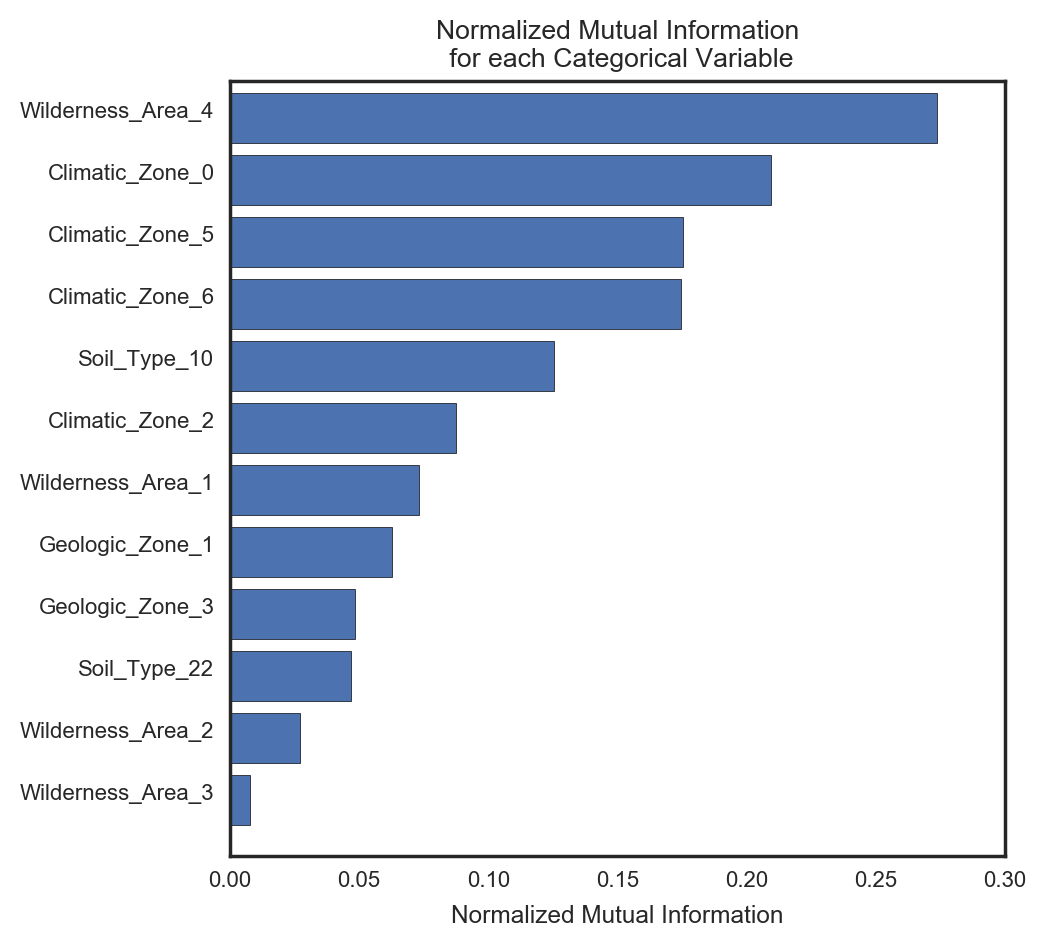

<function __main__.plot_nmi_filtered>

In [25]:
# nmi_df.columns
def plot_nmi_filtered(sort_by_value=True):
    nmi_df = make_nmi_df()
    nmi_df = nmi_df[nmi_df['features'].isin(select_qual_feats)]
    if sort_by_value:
        nmi_df.sort_values(by='mutual_information', inplace=True)

    pos = np.arange(len(nmi_df)) + 0.5
    plt.figure(figsize=(5, 5))
    plt.barh(range(len(nmi_df)), nmi_df['mutual_information'])
    plt.yticks(pos, nmi_df['features'])
    plt.ylim(-0.5, max(pos) + 0.5)
    plt.xlabel('Normalized Mutual Information')
    plt.title('Normalized Mutual Information\n for each Categorical Variable')
    plt.show()
    
    
sort_drop = Dropdown(options=[True, False], value=True, description='Sort')
interact(plot_nmi_filtered, sort_by_value=sort_drop)

## Conclusion

We've had a fun time using the Random Forest Classifier to predict forest cover from cartographic variables. The quantitative variables have a greater variable importance than the categorical variables in general. 

## Future Work

One thing we did not investigate here was the use of combinations of wilderness area, climatic zone, geologic zone, and soil type. It may be possible to create more features, using the combinations of each of these, to investigate whether particular combinations of these features are more predictive of cover type.

# Contest Entry

My contest entries are below.

## Interactive Quantitative Variable Explorer

<function __main__.plot_scatter_factor>

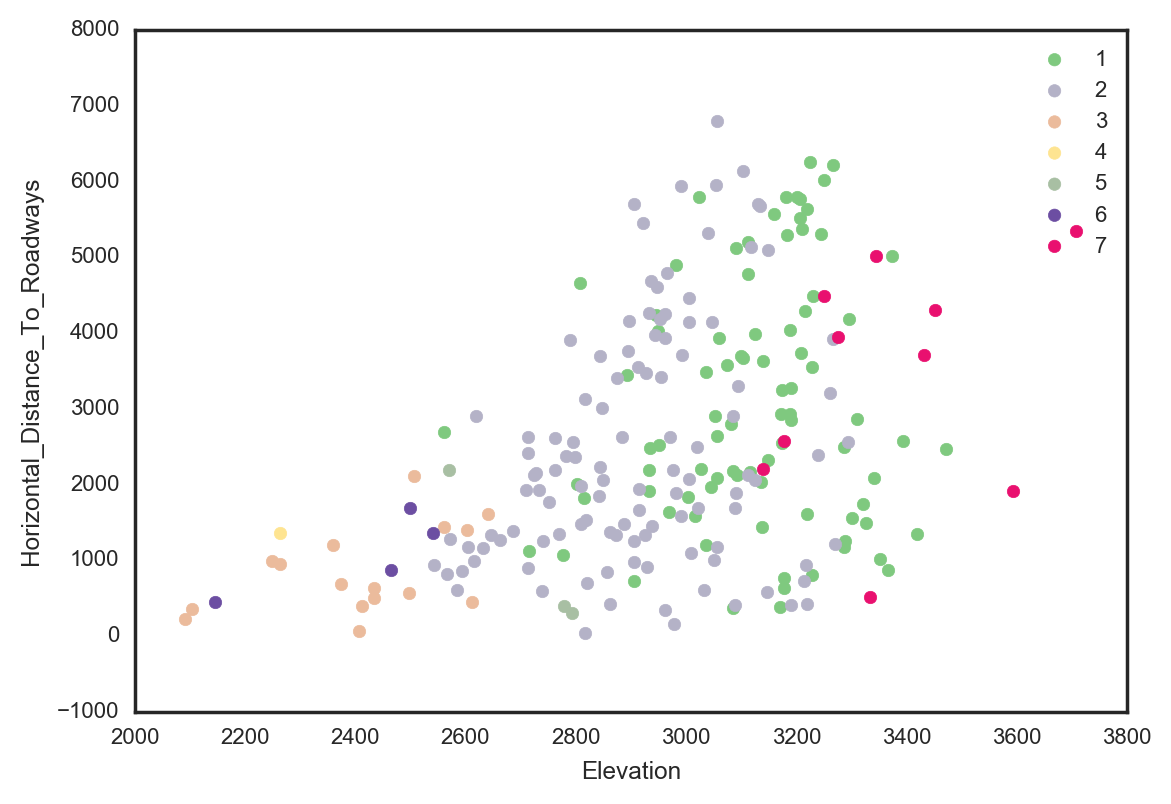

In [26]:
from palettable.colorbrewer.qualitative import Accent_7

def plot_scatter_factor(factor1, factor2, data_frac):
    X_samp = X_traintest.sample(frac=data_frac)
    Y_samp = Y_traintest.ix[X_samp.index]
    
    # get colors
    n_classes = len(np.unique(Y_samp.values))
    # colors = plt.cm.get_cmap('viridis', n_classes)(np.arange(n_classes))
    
    for i, v in enumerate(np.unique(Y_samp.values)):
        color_key = i / len(np.unique(Y_samp.values))
        idxs = Y_samp[Y_samp['Cover_Type'] == v].index
        plt.scatter(X_samp.ix[idxs][factor1], X_samp.ix[idxs][factor2], color=Accent_7.mpl_colormap(color_key), label=v)
    
    # plt.legend(handles=patches, bbox_to_anchor=(1, .3))
    plt.xlabel(factor1)
    plt.ylabel(factor2)
    plt.legend()
        
frac_options = list(np.arange(0.005, 0.021, 0.005))
data_frac_drop = Dropdown(options=frac_options, value=0.005, description='Data Fraction')
fact1_drop = Dropdown(options=select_quant_feats, value=select_quant_feats[0], description='Factor 1')
fact2_drop = Dropdown(options=select_quant_feats, value=select_quant_feats[1], description='Factor 2')
interact(plot_scatter_factor, factor1=fact1_drop, factor2=fact2_drop, data_frac=data_frac_drop)

**Description:** This is an interactive scatterplot explorer that let's an analyst explore the relationship between the quantitative variables. At any moment, the analyst can explore the relationship between any two quantitative variables ('Factors'). The factors are ordered according to their importance, as determined by the Random Forest Classifier above. In particular, because there's so much data, I have shown an option to display just a random fraction of the data. This minimizes re-drawing time. 

**Insights:** This allows the end-user to visually inspect the discriminative power of each variable for distinguishing between each of the 7 classes. Those that have higher discriminative power will show greater separation between the classes along each of the axes.

**Interesting Stuff:** There's some interesting relationships between Aspect and Hillside Shades. Check it out!

Static Overview Figure
--------

Here, we write the code that reproducibly makes the master figure that shows the importance of each of the variables.

Caption is below.

In [27]:
from matplotlib.gridspec import GridSpec

Plotting violin plots.
Elevation
Horizontal_Distance_To_Roadways
Horizontal_Distance_To_Fire_Points
Horizontal_Distance_To_Hydrology
Vertical_Distance_To_Hydrology
Aspect
Hillshade_Noon
Hillshade_9am
Hillshade_3pm
Slope
Plotting mutual information
Plotting feature importances


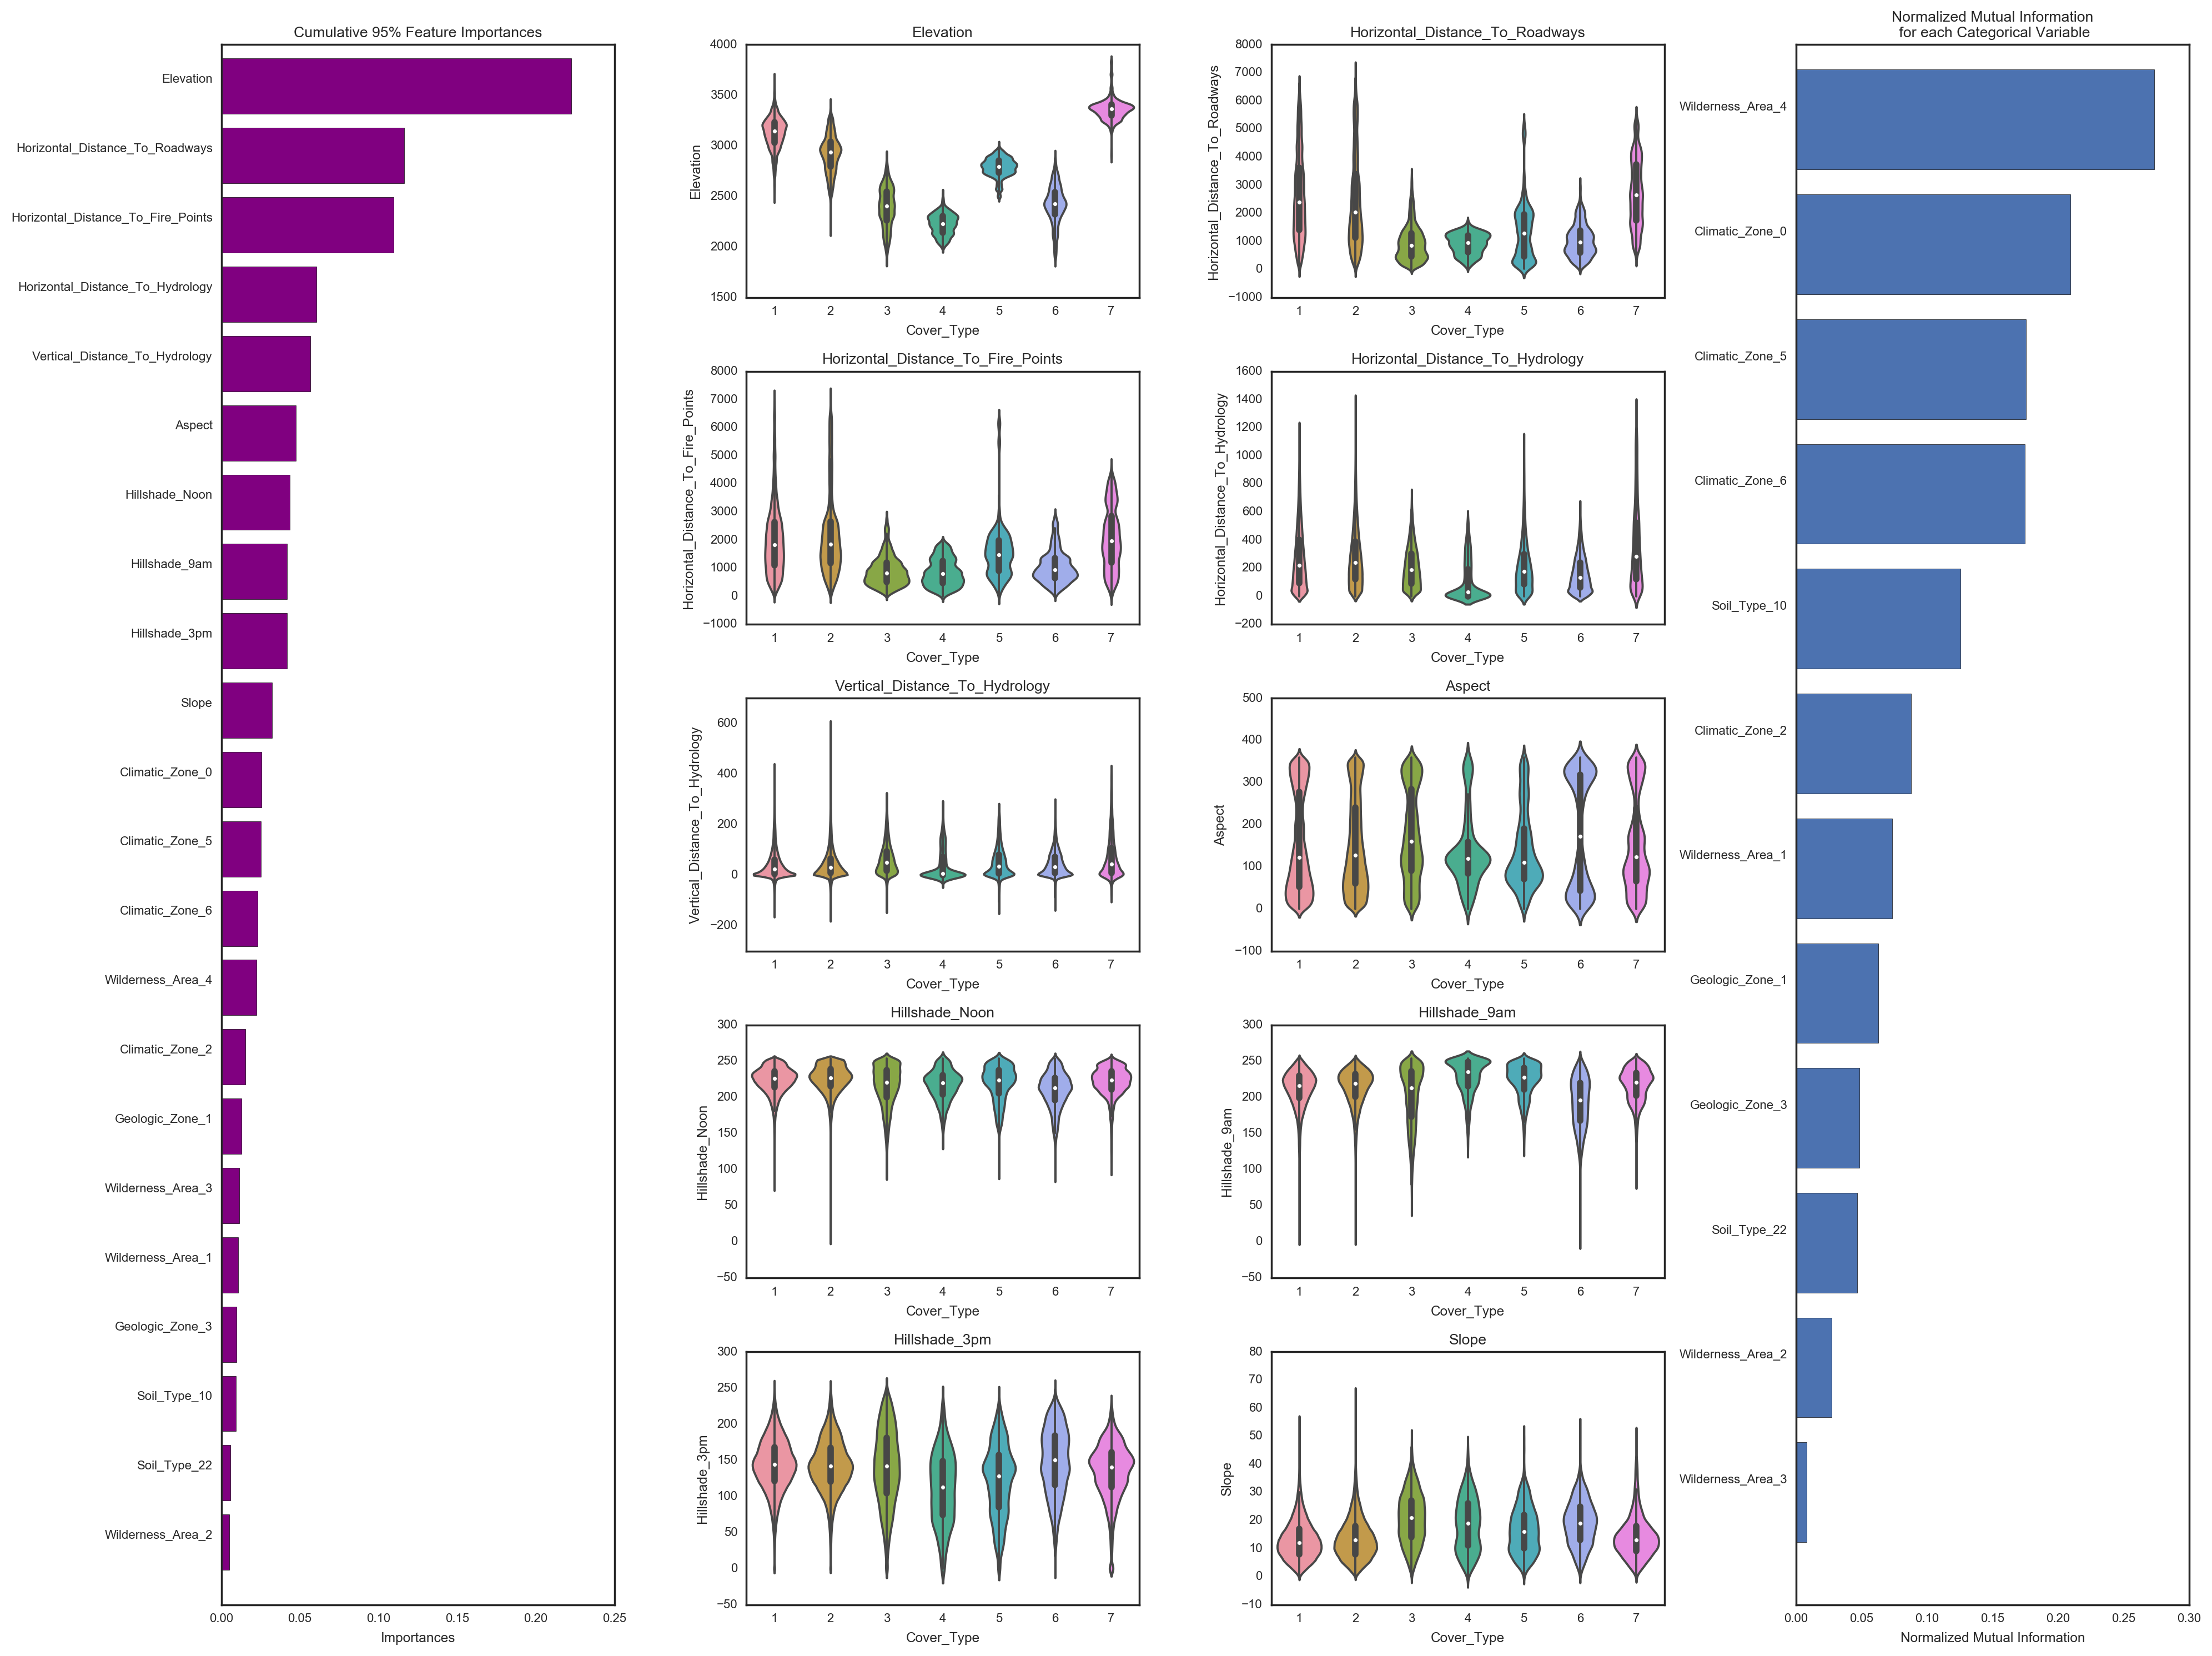

In [28]:
gs = GridSpec(5, 4)

fig = plt.figure(figsize=(20,15))
ax1 = plt.subplot(gs[0, 1])
ax2 = plt.subplot(gs[0, 2])
ax3 = plt.subplot(gs[1, 1])
ax4 = plt.subplot(gs[1, 2])
ax5 = plt.subplot(gs[2, 1])
ax6 = plt.subplot(gs[2, 2])
ax7 = plt.subplot(gs[3, 1])
ax8 = plt.subplot(gs[3, 2])
ax9 = plt.subplot(gs[4, 1])
ax10 = plt.subplot(gs[4, 2])

ax_categorical = plt.subplot(gs[:, 3])
ax_feat_impts = plt.subplot(gs[:, 0])

violin_axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]

print('Plotting violin plots.')
for i, ax in enumerate(violin_axes):
    print(select_quant_feats[i])
    sns.violinplot(data=df, x='Cover_Type', y=select_quant_feats[i], ax=ax)
    ax.set_title(select_quant_feats[i])
    
print('Plotting mutual information')
nmi_df = make_nmi_df()
nmi_df = nmi_df[nmi_df['features'].isin(select_qual_feats)]
nmi_df.sort_values(by='mutual_information', inplace=True)
    
pos = np.arange(len(nmi_df)) + 0.5
ax_categorical.barh(range(len(nmi_df)), nmi_df['mutual_information'])
ax_categorical.set_yticks(pos)
ax_categorical.set_yticklabels(nmi_df['features'])
ax_categorical.set_ylim(-0.5, max(pos) + 0.5)
ax_categorical.set_xlabel('Normalized Mutual Information')
ax_categorical.set_title('Normalized Mutual Information\n for each Categorical Variable')


print('Plotting feature importances')
feat_impts = make_feat_impts()
feat_impts = filter_cumulative_feat_impts(feat_impts)
feat_impts = sort_feat_impts(feat_impts)

# Plot the feature importances.
pos = np.arange(len(feat_impts)) + 0.5
ax_feat_impts.barh(range(len(feat_impts)), feat_impts['Importances'], color='purple')
ax_feat_impts.set_yticks(pos)
ax_feat_impts.set_yticklabels(feat_impts['Features'])
ax_feat_impts.set_ylim(-0.5, max(pos) + 0.5)
ax_feat_impts.set_xlabel('Importances')
ax_feat_impts.set_title('Cumulative 95% Feature Importances')

plt.tight_layout()
plt.savefig('overview_plot.pdf')

**Description:** Overview figure of the most important variables covering 95% of the variable importances, as determined by the Random Forest Classifier.

- Left panel: Rank-ordered list of the most important features (both quantitative and qualitative). Elevation has the greatest importance. 
- Middle two panels: Violin plots of each of the quantitative variables that were included in the top 95% of variable importances. Starting from top-left to bottom-right, they are ordered by the importance in the rank-ordered list on the left panel.
- Right panel: Normalized mutual information scores for each of the categorical variables that were included in the top 95% of variable importances.

**Insights:** This rank-ordered list of variables aids the analyst in hypothesis-generation: 

- Why would elevation be a good predictor? Is it because elevation determines temperature, which in turn determines the best type of plant that will grow in each area? 
- How do soil types, climatic zones, and geologic zones interact to give rise to cover type? Is there a combination of soil type, climatic zone, and geologic zone that correlates best with a particular cover type?

# Testing Bokeh-based Interactive Plots

In [29]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from bokeh.layouts import gridplot, column, row
from bokeh.models.sources import ColumnDataSource
from bokeh.charts import Scatter

output_notebook()

Loading BokehJS ...

In [30]:
df_samp = df.sample(frac=0.001)
src = ColumnDataSource(df_samp)
# s1 = figure(plot_width=250, plot_height=250, title=None)
# s1.circle(x=source.data['Elevation'], y=source.data['Horizontal_Distance_To_Roadways'], color=source.data['Cover_Type'])

TOOLS = "box_select,lasso_select,pan,help,reset"

colors = ['DarkSeaGreen', 'Firebrick', 'Gold', 'Indigo', 'LightCoral', 'LimeGreen', 'MistyRose']
src.data['colors'] = df_samp['Cover_Type'].apply(lambda x: colors[x - 1])

# s1 = Scatter(df_samp, x='Elevation', y='Horizontal_Distance_To_Roadways', color='Cover_Type', plot_height=400, plot_width=400, tools=TOOLS)
# s2 = Scatter(df_samp, x='Elevation', y='Aspect', color='Cover_Type', plot_height=400, plot_width=400, tools=TOOLS, x_range=s1.x_range)

s1 = figure(plot_width=400, plot_height=400, title=None, tools=TOOLS)
s1.scatter(x='Elevation', y='Horizontal_Distance_To_Roadways', color='colors', source=src)

s2 = figure(plot_width=400, plot_height=400, title=None, tools=TOOLS, x_range=s1.x_range)
s2.scatter(x='Elevation', y='Slope', color='colors', source=src)

show(gridplot([[s1, s2]]))
# show(row([s1, s2]))

This is an experimental plot, in which I do linked brushing. Use the box or lasso select to select particular data points, and see where they lie on the other linked plot.